##Importing the neccessary Tools

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [17]:
def wrangle(filepath):
  df=pd.read_csv(filepath)
  #No missing values
  #No Duplication
  #No correlation
  #No high or cardinity
  return df

In [18]:
df=wrangle("/content/drive/MyDrive/advertising.csv")

In [19]:
print('\n', '='*100, '\n')

## Explatory Data Analysis

In [20]:
des_stats = df.describe()

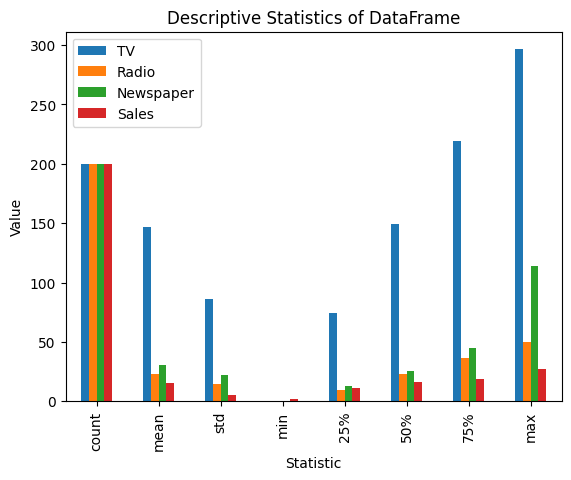

In [21]:
# Plot the descriptive statistics
des_stats.plot(kind="bar")

# Add title and labels
plt.title("Descriptive Statistics of DataFrame")
plt.xlabel("Statistic")
plt.ylabel("Value");

In [22]:
distr=df[["TV","Radio","Newspaper"]]

Visualising using histogram:


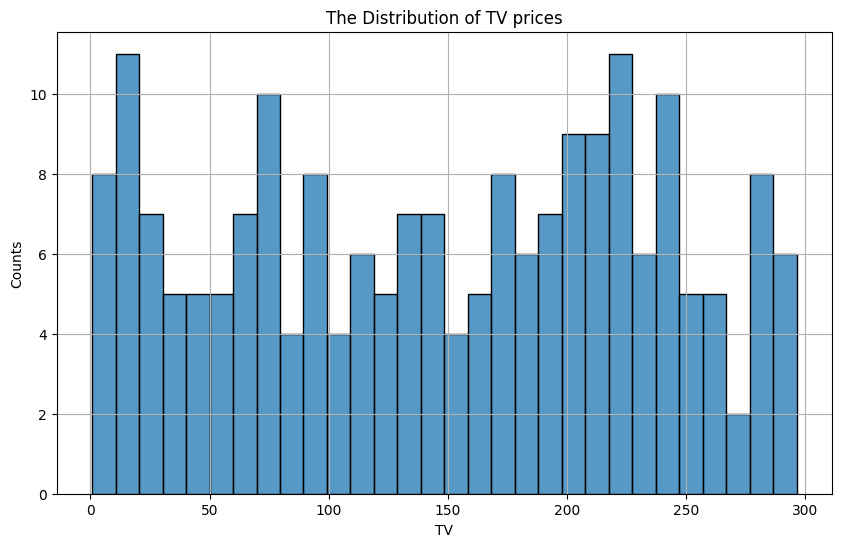

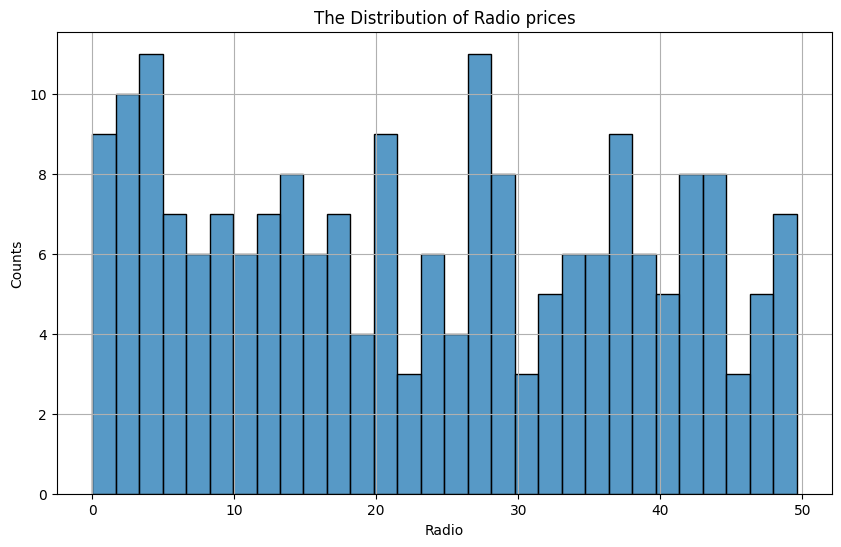

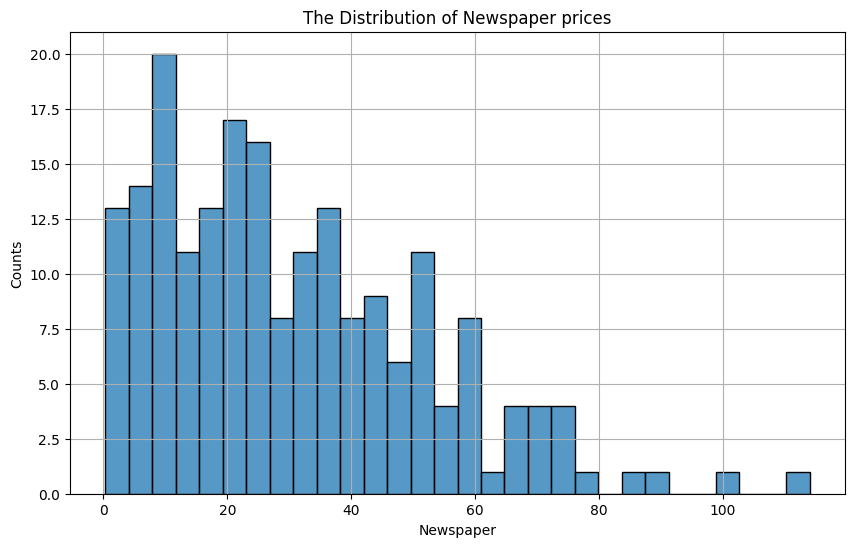

In [23]:
print("Visualising using histogram:")
for col in distr:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col],bins=30)
    plt.title(f"The Distribution of {col} prices")
    plt.xlabel(f"{col}")
    plt.ylabel("Counts")
    plt.grid(True)
    plt.show()

- **The distribution of Radios and Tv prices are uniform**
- **Most of Newspaper prices are in range between 0 and 40**

Visualising using boxplot:


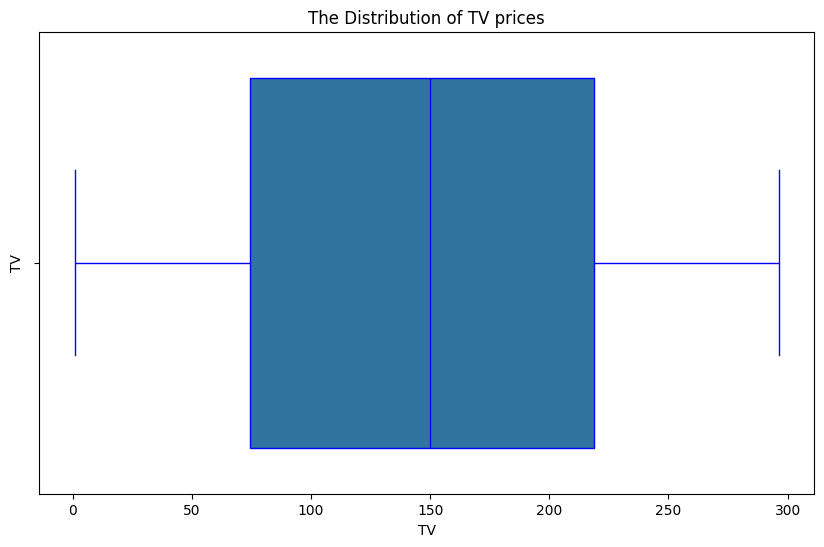

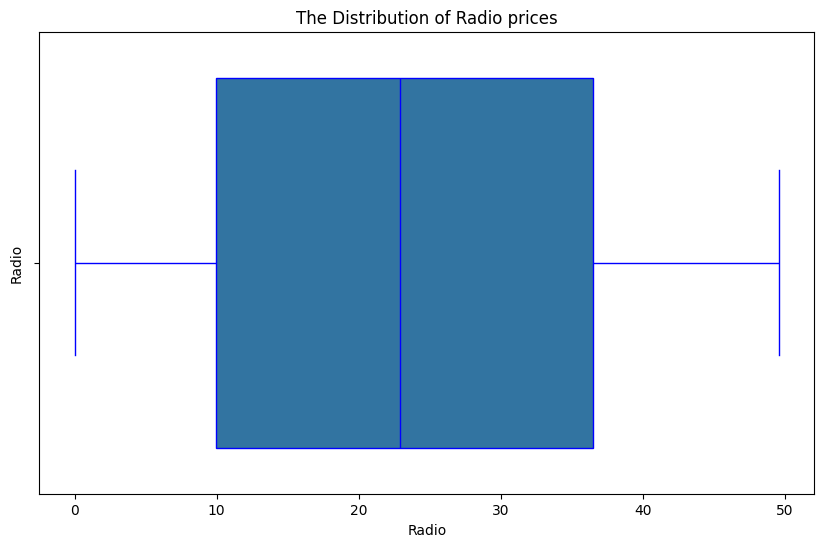

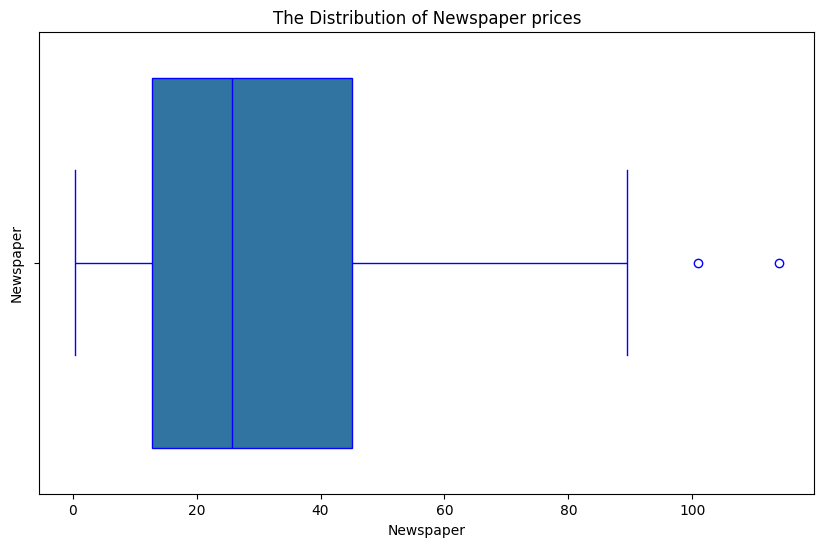

In [24]:
print("Visualising using boxplot:")
for col in distr:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col],vert=False,linecolor='blue')
    plt.title(f"The Distribution of {col} prices")
    plt.ylabel(f"{col}")
    plt.show()

Visualising The correlation


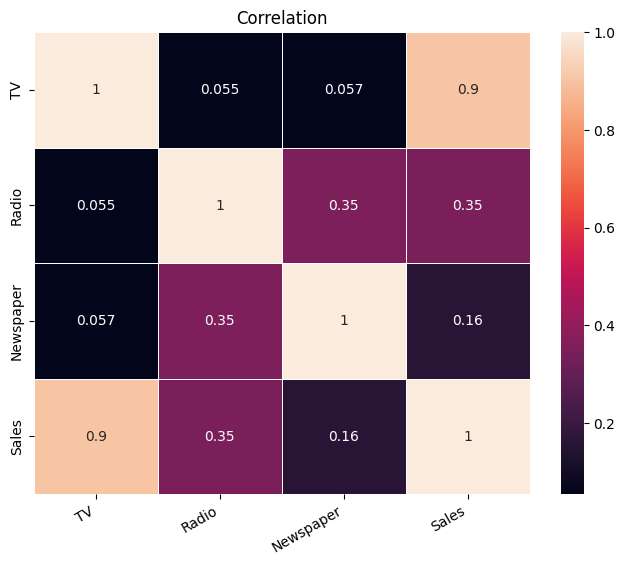

In [25]:
print("Visualising The correlation")
corr=df.corr().abs()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, vmax=1, annot=True, linewidths=.5,)
plt.title("Correlation")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [26]:
print('\n', '='*100, '\n')

## Preprocessing

In [27]:
#split the dataset into Features and Target
X=df.drop("Sales",axis=1)
y=df["Sales"]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=736)

In [29]:
#Feature scaling data in range of (0,1)
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [30]:
X_train=minmax.fit_transform(X_train)
X_test=minmax.fit_transform(X_test)

In [31]:
X_train=pd.DataFrame(X_train,columns=minmax.get_feature_names_out())
X_test=pd.DataFrame(X_test,columns=minmax.get_feature_names_out())

In [32]:
print('\n', '='*100, '\n')

## Modelling

In [33]:
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
lr=LinearRegression()
rfr=RandomForestRegressor()
tree=DecisionTreeRegressor()
svc=SVR()
gpr=GaussianProcessRegressor()
gbr=GradientBoostingRegressor()

In [34]:
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [35]:
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

In [36]:
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)

In [37]:
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

In [38]:
gpr.fit(X_train,y_train)
gpr_pred=gpr.predict(X_test)

In [39]:
gbr.fit(X_train,y_train)
gbr_pred=gbr.predict(X_test)

In [40]:
print('\n', '='*100, '\n')

##Model Evaluation

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
print('The performance evaluation of LinearRegression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))

The performance evaluation of LinearRegression is below:  

Mean squared error:  1.8158790682060164
Mean absolute error:  1.052309250979189
R2 score:  0.9256615767332661


In [43]:
print('The performance evaluation of Random Forest Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rfr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rfr_pred))
print('R2 score: ',r2_score(y_test, rfr_pred))

The performance evaluation of Random Forest Regression is below:  

Mean squared error:  0.8133740250000011
Mean absolute error:  0.6761749999999996
R2 score:  0.9667021094062431


In [44]:
print('The performance evaluation of  Decesion tree is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, tree_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, tree_pred))
print('R2 score: ',r2_score(y_test, tree_pred))

The performance evaluation of  Decesion tree is below:  

Mean squared error:  1.3047500000000005
Mean absolute error:  0.9125
R2 score:  0.9465861689495134


In [45]:
print('The performance evaluation of  Support Vector Machine is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, svc_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, svc_pred))
print('R2 score: ',r2_score(y_test, svc_pred))

The performance evaluation of  Support Vector Machine is below:  

Mean squared error:  4.133680635315021
Mean absolute error:  1.3677917045125016
R2 score:  0.8307754596118917


In [46]:
print('The performance evaluation of  GaussianProcessRegressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, gpr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, gpr_pred))
print('R2 score: ',r2_score(y_test, gpr_pred))

The performance evaluation of  GaussianProcessRegressor is below:  

Mean squared error:  6800.365477589474
Mean absolute error:  18.25037910461426
R2 score:  -277.3932344905347


In [47]:
print('The performance evaluation of  GradientBoostingRegressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, gbr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, gbr_pred))
print('R2 score: ',r2_score(y_test, gbr_pred))

The performance evaluation of  GradientBoostingRegressor is below:  

Mean squared error:  1.0384396580248265
Mean absolute error:  0.8302575783203571
R2 score:  0.9574883767389438


In [48]:
print("The Best performing model is Random Forest Regressor with accuracy of 97%")

The Best performing model is Random Forest Regressor with accuracy of 97%


In [49]:
print('\n', '='*100, '\n')

In [50]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the Random Forest Regressor
rfr = RandomForestRegressor()

# Define the grid search object
grid_search = GridSearchCV(rfr, param_grid, cv=5,verbose=1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [51]:
gs_pred=grid_search.predict(X_test)

In [52]:
print('The performance evaluation of Random Forest Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, gs_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, gs_pred))
print('R2 score: ',r2_score(y_test, gs_pred))

The performance evaluation of Random Forest Regression is below:  

Mean squared error:  0.8356312678091117
Mean absolute error:  0.7172936607142857
R2 score:  0.9657909428171989


## Testing

In [54]:
y_preds=grid_search.predict(X_test)

In [55]:
df2=pd.DataFrame({"Actual Rating":y_test,"Predicted Rating":y_preds})

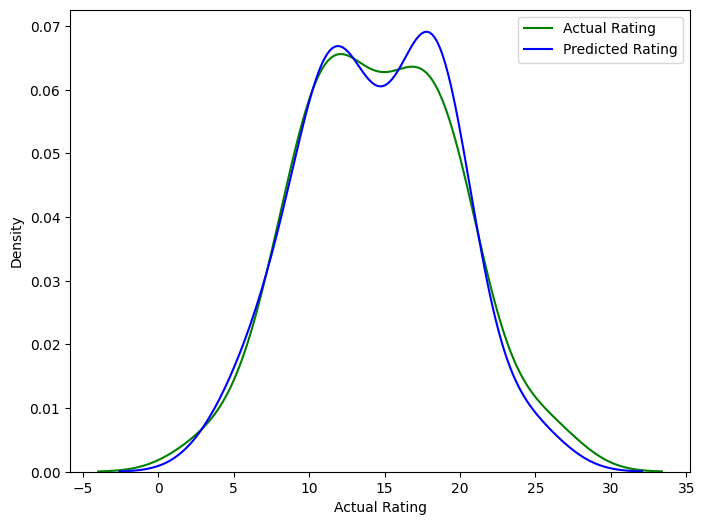

In [56]:
plt.figure(figsize=(8,6))
sns.kdeplot(df2["Actual Rating"],color="green",label="Actual Rating")
sns.kdeplot(df2["Predicted Rating"],color="blue",label="Predicted Rating")
plt.legend();

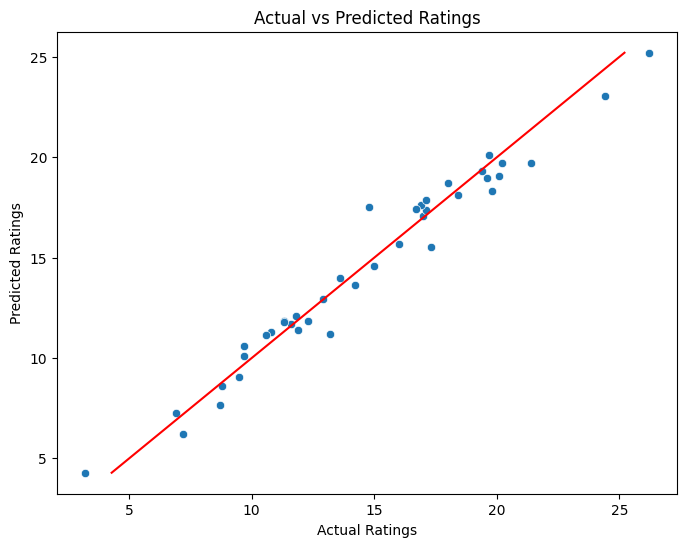

In [57]:
# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_preds)
sns.lineplot(x=y_preds, y=y_preds,color='red')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings');